In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import fastf1 as f1
from ing_theme_matplotlib import mpl_style
import mplcyberpunk
from fastf1 import plotting

In [2]:
f1.Cache.enable_cache("../cache")

*Sprint Qualifyng*

In [5]:
SpQuali = f1.get_session(2024, "Brazil", "Sprint Qualifying")
SpQuali.load()

core           INFO 	Loading data for São Paulo Grand Prix - Sprint Qualifying [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	Sprint Qualifying is not supported by Ergast! Limited results are calculated from timing data.
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. 

In [6]:
SpQuali.session_info

{'Meeting': {'Key': 1249,
  'Name': 'São Paulo Grand Prix',
  'OfficialName': 'FORMULA 1 LENOVO GRANDE PRÊMIO DE SÃO PAULO 2024',
  'Location': 'São Paulo',
  'Number': 21,
  'Country': {'Key': 10, 'Code': 'BRA', 'Name': 'Brazil'},
  'Circuit': {'Key': 14, 'ShortName': 'Interlagos'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9631,
 'Type': 'Qualifying',
 'Name': 'Sprint Qualifying',
 'StartDate': datetime.datetime(2024, 11, 1, 15, 30),
 'EndDate': datetime.datetime(2024, 11, 1, 16, 14),
 'GmtOffset': datetime.timedelta(days=-1, seconds=75600),
 'Path': '2024/2024-11-03_São_Paulo_Grand_Prix/2024-11-01_Sprint_Qualifying/'}

In [7]:
SpQuali.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
81,PIA,McLaren,NaN,1.0,NaT,
4,NOR,McLaren,NaN,2.0,NaT,
16,LEC,Ferrari,NaN,3.0,NaT,
1,VER,Red Bull Racing,NaN,4.0,NaT,
55,SAI,Ferrari,NaN,5.0,NaT,
63,RUS,Mercedes,NaN,6.0,NaT,
10,GAS,Alpine,NaN,7.0,NaT,
30,LAW,RB,NaN,8.0,NaT,
23,ALB,Williams,NaN,9.0,NaT,
50,BEA,Haas F1 Team,NaN,10.0,NaT,


In [8]:
SpQuali.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:18:35.097000,NOR,4,NaT,1.0,1.0,0 days 00:16:28.622000,NaT,NaT,0 days 00:00:40.836000,...,True,McLaren,0 days 00:16:28.622000,2024-11-01 18:31:28.631,1,NaN,False,,False,False
1,0 days 00:19:45.769000,NOR,4,0 days 00:01:10.672000,2.0,1.0,NaT,NaT,0 days 00:00:18.312000,0 days 00:00:35.964000,...,True,McLaren,0 days 00:18:35.097000,2024-11-01 18:33:35.106,1,NaN,False,,False,True
2,0 days 00:21:25.998000,NOR,4,0 days 00:01:40.229000,3.0,1.0,NaT,0 days 00:21:23.109000,0 days 00:00:30.583000,0 days 00:00:46.103000,...,True,McLaren,0 days 00:19:45.769000,2024-11-01 18:34:45.778,1,NaN,False,,False,False
3,0 days 00:26:43.366000,NOR,4,NaT,4.0,2.0,0 days 00:24:18.730000,NaT,NaT,0 days 00:00:48.111000,...,False,McLaren,0 days 00:21:25.998000,2024-11-01 18:36:26.007,1,NaN,False,,False,False
4,0 days 00:27:52.843000,NOR,4,0 days 00:01:09.477000,5.0,2.0,NaT,NaT,0 days 00:00:18.031000,0 days 00:00:35.283000,...,False,McLaren,0 days 00:26:43.366000,2024-11-01 18:41:43.375,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0 days 00:16:52.125000,ZHO,24,NaT,1.0,1.0,0 days 00:15:16.183000,NaT,NaT,0 days 00:00:46.474000,...,True,Kick Sauber,0 days 00:15:16.183000,2024-11-01 18:30:16.192,1,NaN,False,,False,False
217,0 days 00:18:05.103000,ZHO,24,0 days 00:01:12.978000,2.0,1.0,NaT,NaT,0 days 00:00:18.978000,0 days 00:00:37.398000,...,True,Kick Sauber,0 days 00:16:52.125000,2024-11-01 18:31:52.134,1,NaN,False,,False,True
218,0 days 00:19:47.517000,ZHO,24,0 days 00:01:42.414000,3.0,1.0,NaT,0 days 00:19:44.535000,0 days 00:00:25.034000,0 days 00:00:50.886000,...,True,Kick Sauber,0 days 00:18:05.103000,2024-11-01 18:33:05.112,1,NaN,False,,False,False
219,0 days 00:27:05.697000,ZHO,24,NaT,4.0,2.0,0 days 00:24:50.550000,NaT,NaT,0 days 00:00:49.255000,...,False,Kick Sauber,0 days 00:19:47.517000,2024-11-01 18:34:47.526,1,NaN,False,,False,False


In [9]:
pia = SpQuali.get_driver("PIA")
pia

DriverNumber                                                         81
BroadcastName                                                 O PIASTRI
Abbreviation                                                        PIA
DriverId                                                               
TeamName                                                        McLaren
TeamColor                                                        FF8000
TeamId                                                                 
FirstName                                                         Oscar
LastName                                                        Piastri
FullName                                                  Oscar Piastri
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         AUS
Position                                                            1.0
ClassifiedPosition                                              

In [10]:
pia_laps =  SpQuali.laps.pick_driver("PIA")
pia_lap_time = pia_laps["LapTime"]
pia_sec1 = pia_laps["Sector1Time"]
pia_sec2 = pia_laps["Sector2Time"]
pia_sec3 = pia_laps["Sector3Time"]
pia_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
41,NaT,NaT,0 days 00:00:46.749000,0 days 00:00:17.208000,244.0,236.0,322.0,NaN
42,0 days 00:01:10.265000,0 days 00:00:18.209000,0 days 00:00:35.761000,0 days 00:00:16.295000,329.0,265.0,320.0,327.0
43,0 days 00:01:35.295000,0 days 00:00:22.490000,0 days 00:00:47.233000,0 days 00:00:25.572000,238.0,183.0,NaN,259.0
44,NaT,NaT,0 days 00:00:53.263000,0 days 00:00:26.336000,169.0,212.0,NaN,259.0
45,NaT,NaT,0 days 00:00:45.871000,0 days 00:00:17.216000,262.0,240.0,323.0,NaN
46,0 days 00:01:09.603000,0 days 00:00:18.031000,0 days 00:00:35.361000,0 days 00:00:16.211000,327.0,267.0,320.0,328.0
47,0 days 00:01:38.526000,0 days 00:00:24.965000,0 days 00:00:49,0 days 00:00:24.561000,210.0,195.0,NaN,245.0
48,NaT,NaT,0 days 00:00:47.492000,0 days 00:00:17.327000,199.0,233.0,320.0,NaN
49,0 days 00:01:09.239000,0 days 00:00:18.072000,0 days 00:00:34.941000,0 days 00:00:16.226000,327.0,266.0,319.0,325.0
50,0 days 00:01:35.175000,0 days 00:00:23.229000,0 days 00:00:45.711000,0 days 00:00:26.235000,232.0,190.0,NaN,249.0


In [11]:
fastest_pia = pia_laps.pick_fastest()
tele_pia = fastest_pia.get_telemetry().add_distance()
tele_pia.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,320,8,11303
3,320,8,11311
4,321,8,11316
5,321,8,11325
6,322,8,11334
...,...,...,...
529,320,8,11271
530,320,8,11268
531,320,8,11265
532,320,8,11263


In [12]:
lec = SpQuali.get_driver("LEC")
lec

DriverNumber                                                         16
BroadcastName                                                 C LECLERC
Abbreviation                                                        LEC
DriverId                                                               
TeamName                                                        Ferrari
TeamColor                                                        E80020
TeamId                                                                 
FirstName                                                       Charles
LastName                                                        Leclerc
FullName                                                Charles Leclerc
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         MON
Position                                                            3.0
ClassifiedPosition                                              

In [13]:
lec_laps =  SpQuali.laps.pick_driver("LEC")
lec_lap_time = lec_laps["LapTime"]
lec_sec1 = lec_laps["Sector1Time"]
lec_sec2 = lec_laps["Sector2Time"]
lec_sec3 = lec_laps["Sector3Time"]
lec_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
69,NaT,NaT,0 days 00:00:44.291000,0 days 00:00:17.635000,270.0,236.0,317.0,NaN
70,0 days 00:01:11.654000,0 days 00:00:18.585000,0 days 00:00:36.593000,0 days 00:00:16.476000,323.0,265.0,323.0,322.0
71,0 days 00:01:46.922000,0 days 00:00:36.954000,0 days 00:00:49.416000,0 days 00:00:20.552000,111.0,221.0,149.0,254.0
72,0 days 00:01:39.452000,0 days 00:00:32.523000,0 days 00:00:48.213000,0 days 00:00:18.716000,230.0,193.0,318.0,156.0
73,0 days 00:01:10.453000,0 days 00:00:18.309000,0 days 00:00:35.854000,0 days 00:00:16.290000,325.0,267.0,319.0,324.0
74,0 days 00:01:44.830000,0 days 00:00:33.594000,0 days 00:00:48.111000,0 days 00:00:23.125000,183.0,208.0,119.0,265.0
75,0 days 00:01:43.249000,0 days 00:00:31.857000,0 days 00:00:52.753000,0 days 00:00:18.639000,171.0,68.0,320.0,128.0
76,0 days 00:01:10.388000,0 days 00:00:18.133000,0 days 00:00:35.762000,0 days 00:00:16.493000,325.0,269.0,319.0,325.0
77,0 days 00:01:33.909000,0 days 00:00:23.152000,0 days 00:00:45.875000,0 days 00:00:24.882000,279.0,214.0,NaN,127.0
78,NaT,NaT,0 days 00:00:40.855000,0 days 00:00:23.934000,272.0,126.0,319.0,NaN


In [14]:
fastest_lec = lec_laps.pick_fastest()
tele_lec = fastest_lec.get_telemetry().add_distance()
tele_lec.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,319,8,11371
3,320,8,11383
4,320,8,11397
5,321,8,11412
6,321,8,11416
...,...,...,...
525,321,8,11401
526,320,8,11384
527,320,8,11368
528,320,8,11372


In [15]:
ver = SpQuali.get_driver("VER")
ver

DriverNumber                                                          1
BroadcastName                                              M VERSTAPPEN
Abbreviation                                                        VER
DriverId                                                               
TeamName                                                Red Bull Racing
TeamColor                                                        3671C6
TeamId                                                                 
FirstName                                                           Max
LastName                                                     Verstappen
FullName                                                 Max Verstappen
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         NED
Position                                                            4.0
ClassifiedPosition                                              

In [16]:
ver_laps =  SpQuali.laps.pick_driver("VER")
ver_lap_time = ver_laps["LapTime"]
ver_sec1 = ver_laps["Sector1Time"]
ver_sec2 = ver_laps["Sector2Time"]
ver_sec3 = ver_laps["Sector3Time"]
ver_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
169,NaT,NaT,0 days 00:00:44.693000,0 days 00:00:19.231000,294.0,243.0,319.0,NaN
170,0 days 00:01:10.590000,0 days 00:00:18.099000,0 days 00:00:36.031000,0 days 00:00:16.460000,328.0,264.0,322.0,327.0
171,0 days 00:01:44.209000,0 days 00:00:35.432000,0 days 00:00:49.251000,0 days 00:00:19.526000,181.0,202.0,212.0,241.0
172,0 days 00:01:47.296000,0 days 00:00:38.993000,0 days 00:00:50.895000,0 days 00:00:17.408000,175.0,227.0,318.0,149.0
173,0 days 00:01:10.409000,0 days 00:00:18.069000,0 days 00:00:36.023000,0 days 00:00:16.317000,326.0,266.0,325.0,324.0
174,0 days 00:01:42.145000,0 days 00:00:27.790000,0 days 00:00:51.248000,0 days 00:00:23.107000,204.0,131.0,NaN,255.0
175,NaT,NaT,0 days 00:00:46.687000,0 days 00:00:19.590000,288.0,57.0,319.0,NaN
176,0 days 00:01:09.489000,0 days 00:00:17.969000,0 days 00:00:35.299000,0 days 00:00:16.221000,326.0,266.0,322.0,324.0
177,0 days 00:01:41.083000,0 days 00:00:26.022000,0 days 00:00:50.990000,0 days 00:00:24.071000,193.0,187.0,NaN,251.0
178,NaT,NaT,0 days 00:00:48.054000,0 days 00:00:16.940000,255.0,244.0,320.0,NaN


In [17]:
fastest_ver = ver_laps.pick_fastest()
tele_ver = fastest_ver.get_telemetry().add_distance()
tele_ver.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,322,8,11392
3,322,8,11411
4,323,8,11448
5,323,8,11471
6,323,8,11495
...,...,...,...
543,320,8,11339
544,321,8,11370
545,321,8,11370
546,321,8,11371


In [18]:
gas = SpQuali.get_driver("GAS")
gas

DriverNumber                                                         10
BroadcastName                                                   P GASLY
Abbreviation                                                        GAS
DriverId                                                               
TeamName                                                         Alpine
TeamColor                                                        0093cc
TeamId                                                                 
FirstName                                                        Pierre
LastName                                                          Gasly
FullName                                                   Pierre Gasly
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         FRA
Position                                                            7.0
ClassifiedPosition                                              

In [19]:
gas_laps =  SpQuali.laps.pick_driver("GAS")
gas_lap_time = gas_laps["LapTime"]
gas_sec1 = gas_laps["Sector1Time"]
gas_sec2 = gas_laps["Sector2Time"]
gas_sec3 = gas_laps["Sector3Time"]
gas_laps.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
116,NaT,NaT,0 days 00:00:49.143000,0 days 00:00:17.838000,284.0,226.0,320.0,NaN
117,0 days 00:01:11.630000,0 days 00:00:18.381000,0 days 00:00:36.749000,0 days 00:00:16.500000,326.0,264.0,324.0,327.0
118,0 days 00:01:41.415000,0 days 00:00:25.809000,0 days 00:00:50.913000,0 days 00:00:24.693000,246.0,214.0,NaN,250.0
119,NaT,NaT,0 days 00:00:48.739000,0 days 00:00:19.113000,199.0,208.0,321.0,NaN
120,0 days 00:01:10.630000,0 days 00:00:18.191000,0 days 00:00:36.090000,0 days 00:00:16.349000,327.0,265.0,324.0,327.0
121,0 days 00:01:42.556000,0 days 00:00:24.779000,0 days 00:00:47.906000,0 days 00:00:29.871000,240.0,191.0,NaN,280.0
122,NaT,NaT,0 days 00:00:44.958000,0 days 00:00:17.475000,264.0,231.0,318.0,NaN
123,0 days 00:01:09.787000,0 days 00:00:18.143000,0 days 00:00:35.398000,0 days 00:00:16.246000,326.0,267.0,323.0,325.0
124,0 days 00:01:40.712000,0 days 00:00:24.564000,0 days 00:00:48.698000,0 days 00:00:27.450000,249.0,178.0,NaN,273.0
125,NaT,NaT,0 days 00:00:47.775000,0 days 00:00:17.381000,214.0,230.0,319.0,NaN


In [20]:
fastest_gas = gas_laps.pick_fastest()
tele_gas = fastest_gas.get_telemetry().add_distance()
tele_gas.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,320,8,11476
3,321,8,11480
4,321,8,11491
5,322,8,11502
6,322,8,11503
...,...,...,...
543,323,8,11530
544,323,8,11540
545,323,8,11550
546,323,8,11574


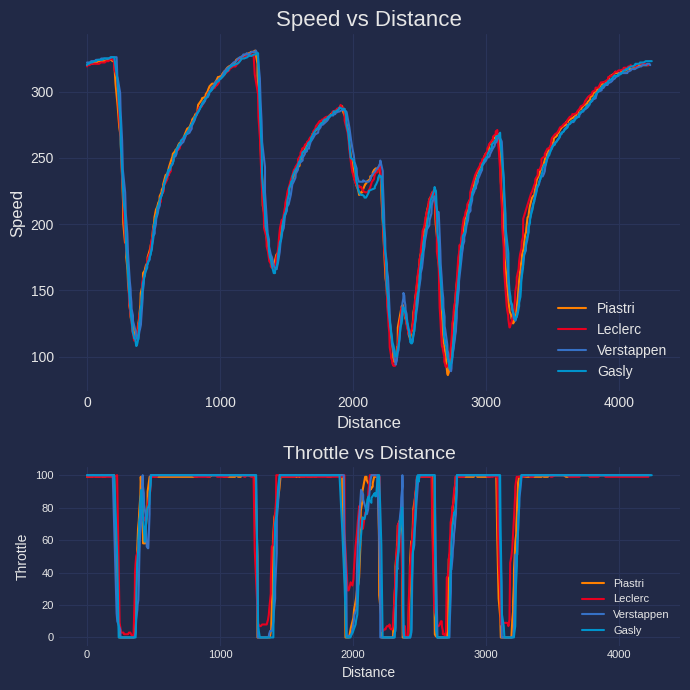

In [22]:
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip("#")
    r, g, b = [int(hex_color[i : i + 2], 16) for i in (0, 2, 4)]
    return (r / 255, g / 255, b / 255)


def get_driver_color(driver_abbreviation):
    driver = SpQuali.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


plt.style.use("cyberpunk")

fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_pia.Distance, tele_pia.Speed, label="Piastri", color=get_driver_color("PIA")
)
ax[0].plot(
    tele_lec.Distance, tele_lec.Speed, label="Leclerc", color=get_driver_color("LEC")
)
ax[0].plot(
    tele_ver.Distance, tele_ver.Speed, label="Verstappen", color=get_driver_color("VER")
)
ax[0].plot(
    tele_gas.Distance, tele_gas.Speed, label="Gasly", color=get_driver_color("GAS")
)


ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_pia.Distance, tele_pia.Throttle, label="Piastri", color=get_driver_color("PIA")
)
ax[1].plot(
    tele_lec.Distance, tele_lec.Throttle, label="Leclerc", color=get_driver_color("LEC")
)
ax[1].plot(
    tele_ver.Distance, tele_ver.Throttle, label="Verstappen", color=get_driver_color("VER")
)

ax[1].plot(
    tele_gas.Distance, tele_gas.Throttle, label="Gasly", color=get_driver_color("GAS")
)

ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

In [32]:
def convert_to_normal(time):
    if pd.isna(time):
        return time

    time_str = str(time)
    parts = time_str.split()

    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(":")[1:]
    seconds, microseconds = seconds_with_microseconds.split(".")

    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)

    total_microseconds = (
        days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    )

    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)

    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

In [34]:
driver2_sectors = pd.DataFrame(
    {
        "Driver": ["Piastri"] * len(pia_sec1),
        "Sector1Time": pia_sec1,
        "Sector2Time": pia_sec2,
        "Sector3Time": pia_sec3,
        "Lap Time": pia_lap_time,
    }
)

driver1_sectors = pd.DataFrame(
    {
        "Driver": ["Verstappen"] * len(ver_sec1),
        "Sector1Time": ver_sec1,
        "Sector2Time": ver_sec2,
        "Sector3Time": ver_sec3,
        "Lap Time": ver_lap_time,
    }
)

driver3_sectors = pd.DataFrame(
    {
        "Driver": ["Leclerc"] * len(lec_sec1),
        "Sector1Time": lec_sec1,
        "Sector2Time": lec_sec2,
        "Sector3Time": lec_sec3,
        "Lap Time": lec_lap_time,
    }
)

driver4_sectors = pd.DataFrame(
    {
        "Driver": ["Gasly"] * len(gas_sec1),
        "Sector1Time": gas_sec1,
        "Sector2Time": gas_sec2,
        "Sector3Time": gas_sec3,
        "Lap Time": gas_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors, driver2_sectors, driver3_sectors,driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors["Sector1Time"] = all_drivers_sectors["Sector1Time"].apply(
    convert_to_normal
)
# all_drivers_sectors["Sector2Time"] = all_drivers_sectors["Sector2Time"].apply(
#     convert_to_normal
# )
all_drivers_sectors["Sector3Time"] = all_drivers_sectors["Sector3Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Lap Time"] = all_drivers_sectors["Lap Time"].apply(
    convert_to_normal
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Verstappen,00:18.099000,0 days 00:00:36.031000,00:16.460000,01:10.590000
2,Verstappen,00:35.432000,0 days 00:00:49.251000,00:19.526000,01:44.209000
3,Verstappen,00:38.993000,0 days 00:00:50.895000,00:17.408000,01:47.296000
4,Verstappen,00:18.069000,0 days 00:00:36.023000,00:16.317000,01:10.409000
5,Verstappen,00:27.790000,0 days 00:00:51.248000,00:23.107000,01:42.145000
7,Verstappen,00:17.969000,0 days 00:00:35.299000,00:16.221000,01:09.489000
8,Verstappen,00:26.022000,0 days 00:00:50.990000,00:24.071000,01:41.083000
10,Verstappen,00:17.857000,0 days 00:00:35.160000,00:16.202000,01:09.219000
11,Verstappen,00:25.114000,0 days 00:00:46.907000,00:28.543000,01:40.564000
13,Piastri,00:18.209000,0 days 00:00:35.761000,00:16.295000,01:10.265000


In [ ]:
from datetime import timedelta

melted_data = all_drivers_sectors.melt(
    id_vars=["Driver"],
    value_vars=["Sector1Time", "Sector2Time", "Sector3Time"],
    var_name="Sector",
    value_name="Time",
)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=melted_data, x="Driver", y="Time", hue="Sector", palette="viridis"
)

for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(
        f"{timedelta(seconds=height)}", 
        (p.get_x() + p.get_width() / 2.0, height),
        ha="center",
        va="bottom",
        fontsize=10,
        color="white",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.title("Sector Times Comparison")
plt.ylabel("Time (seconds)")
plt.xlabel("Driver")
plt.gca().set_yticks([])
plt.gca().invert_yaxis()
plt.show()

*Sprint*

In [35]:

sprint = f1.get_session(2024, "Brazil", "Sprint")
sprint.load()

core           INFO 	Loading data for São Paulo Grand Prix - Sprint [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	N

In [36]:
sprint.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
4,NOR,McLaren,2.0,1.0,0 days 00:29:46.045000,Finished
81,PIA,McLaren,1.0,2.0,0 days 00:00:00.593000,Finished
16,LEC,Ferrari,3.0,3.0,0 days 00:00:05.656000,Finished
1,VER,Red Bull Racing,4.0,4.0,0 days 00:00:06.497000,Finished
55,SAI,Ferrari,5.0,5.0,0 days 00:00:07.224000,Finished
63,RUS,Mercedes,6.0,6.0,0 days 00:00:12.475000,Finished
10,GAS,Alpine,7.0,7.0,0 days 00:00:18.161000,Finished
11,PER,Red Bull Racing,13.0,8.0,0 days 00:00:18.717000,Finished
30,LAW,RB,8.0,9.0,0 days 00:00:20.773000,Finished
23,ALB,Williams,9.0,10.0,0 days 00:00:24.606000,Finished


In [37]:
laps = sprint.laps
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:45:46.814000,VER,1,NaT,1.0,1.0,NaT,NaT,NaT,0 days 00:00:38.254000,...,False,Red Bull Racing,0 days 00:44:27.730000,2024-11-02 14:03:09.599,1,4.0,False,,False,False
1,0 days 00:46:59.125000,VER,1,0 days 00:01:12.311000,2.0,1.0,NaT,NaT,0 days 00:00:18.902000,0 days 00:00:37.261000,...,False,Red Bull Racing,0 days 00:45:46.814000,2024-11-02 14:04:28.683,1,4.0,False,,False,True
2,0 days 00:48:11.579000,VER,1,0 days 00:01:12.454000,3.0,1.0,NaT,NaT,0 days 00:00:18.813000,0 days 00:00:37.327000,...,False,Red Bull Racing,0 days 00:46:59.125000,2024-11-02 14:05:40.994,1,4.0,False,,False,True
3,0 days 00:49:24.140000,VER,1,0 days 00:01:12.561000,4.0,1.0,NaT,NaT,0 days 00:00:18.555000,0 days 00:00:37.462000,...,False,Red Bull Racing,0 days 00:48:11.579000,2024-11-02 14:06:53.448,1,4.0,False,,False,True
4,0 days 00:50:36.444000,VER,1,0 days 00:01:12.304000,5.0,1.0,NaT,NaT,0 days 00:00:18.726000,0 days 00:00:37.101000,...,False,Red Bull Racing,0 days 00:49:24.140000,2024-11-02 14:08:06.009,1,4.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,0 days 01:08:37.942000,PIA,81,0 days 00:01:12.307000,20.0,1.0,NaT,NaT,0 days 00:00:18.955000,0 days 00:00:36.930000,...,False,McLaren,0 days 01:07:25.635000,2024-11-02 14:26:07.504,1,1.0,False,,False,True
472,0 days 01:09:51.395000,PIA,81,0 days 00:01:13.453000,21.0,1.0,NaT,NaT,0 days 00:00:19.053000,0 days 00:00:37.859000,...,False,McLaren,0 days 01:08:37.942000,2024-11-02 14:27:19.811,12,1.0,False,,False,True
473,0 days 01:11:15.487000,PIA,81,0 days 00:01:24.092000,22.0,1.0,NaT,NaT,0 days 00:00:19.583000,0 days 00:00:38.576000,...,False,McLaren,0 days 01:09:51.395000,2024-11-02 14:28:33.264,26,2.0,False,,False,False
474,0 days 01:12:57.957000,PIA,81,0 days 00:01:42.470000,23.0,1.0,NaT,NaT,0 days 00:00:25.105000,0 days 00:00:52.681000,...,False,McLaren,0 days 01:11:15.487000,2024-11-02 14:29:57.356,6,2.0,False,,False,False


In [38]:
nor_sprint = sprint.laps.pick_driver("NOR")
fastest_lap_nor_sprint = nor_sprint.pick_fastest().LapTime
nor_sprint_lap_time = nor_sprint["LapTime"]
nor_sprint_sec1 = nor_sprint["Sector1Time"]
nor_sprint_sec2 = nor_sprint["Sector2Time"]
nor_sprint_sec3 = nor_sprint["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_nor_sprint),
    "which was in Lap number",
    nor_sprint.pick_fastest().LapNumber,
)
nor_sprint.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:11.917000 which was in Lap number 15.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
284,NaT,NaT,0 days 00:00:37.306000,0 days 00:00:16.292000,306.0,247.0,319.0,213.0
285,0 days 00:01:12.274000,0 days 00:00:18.907000,0 days 00:00:37.136000,0 days 00:00:16.231000,308.0,247.0,320.0,293.0
286,0 days 00:01:12.502000,0 days 00:00:18.815000,0 days 00:00:37.345000,0 days 00:00:16.342000,307.0,251.0,332.0,304.0
287,0 days 00:01:12.010000,0 days 00:00:18.653000,0 days 00:00:37.162000,0 days 00:00:16.195000,314.0,248.0,333.0,306.0
288,0 days 00:01:12.287000,0 days 00:00:18.678000,0 days 00:00:37.333000,0 days 00:00:16.276000,NaN,252.0,332.0,310.0


In [39]:
fastest_lap_sprint_nor = nor_sprint.pick_fastest()
tele_sprint_nor = fastest_lap_sprint_nor.get_telemetry().add_distance()
speed_sprint_nor = tele_sprint_nor.Speed
tele_sprint_nor.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,333,8,11801
3,334,8,11827
4,336,8,11879
5,336,8,11894
6,337,8,11910
...,...,...,...
540,333,8,11768
541,333,8,11762
542,333,8,11757
543,333,8,11752


In [41]:
lec_sprint = sprint.laps.pick_driver("LEC")
fastest_lap_lec_sprint = lec_sprint.pick_fastest().LapTime
lec_sprint_lap_time = lec_sprint["LapTime"]
lec_sprint_sec1 = lec_sprint["Sector1Time"]
lec_sprint_sec2 = lec_sprint["Sector2Time"]
lec_sprint_sec3 = lec_sprint["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_lec_sprint),
    "which was in Lap number",
    lec_sprint.pick_fastest().LapNumber,
)
lec_sprint.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:11.914000 which was in Lap number 3.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
96,NaT,NaT,0 days 00:00:37.988000,0 days 00:00:16.399000,310.0,247.0,315.0,217.0
97,0 days 00:01:12.523000,0 days 00:00:18.938000,0 days 00:00:37.274000,0 days 00:00:16.311000,306.0,252.0,316.0,321.0
98,0 days 00:01:11.914000,0 days 00:00:18.879000,0 days 00:00:36.844000,0 days 00:00:16.191000,305.0,253.0,331.0,313.0
99,0 days 00:01:12.085000,0 days 00:00:18.554000,0 days 00:00:37.277000,0 days 00:00:16.254000,318.0,251.0,331.0,324.0
100,0 days 00:01:12.525000,0 days 00:00:18.628000,0 days 00:00:37.450000,0 days 00:00:16.447000,313.0,245.0,315.0,319.0


In [42]:
fastest_lap_sprint_lec = lec_sprint.pick_fastest()
tele_sprint_lec = fastest_lap_sprint_lec.get_telemetry().add_distance()
speed_sprint_lec = tele_sprint_lec.Speed
tele_sprint_lec.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,317,8,11328
3,317,8,11339
4,318,8,11362
5,318,8,11372
6,319,8,11382
...,...,...,...
560,330,8,11777
561,331,8,11780
562,331,8,11795
563,332,8,11811


In [43]:
ver_sprint = sprint.laps.pick_driver("VER")
fastest_lap_ver_sprint = ver_sprint.pick_fastest().LapTime
ver_sprint_lap_time = ver_sprint["LapTime"]
ver_sprint_sec1 = ver_sprint["Sector1Time"]
ver_sprint_sec2 = ver_sprint["Sector2Time"]
ver_sprint_sec3 = ver_sprint["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_ver_sprint),
    "which was in Lap number",
    ver_sprint.pick_fastest().LapNumber,
)
ver_sprint.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:11.852000 which was in Lap number 18.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:38.254000,0 days 00:00:16.432000,313.0,252.0,319.0,220.0
1,0 days 00:01:12.311000,0 days 00:00:18.902000,0 days 00:00:37.261000,0 days 00:00:16.148000,322.0,252.0,337.0,317.0
2,0 days 00:01:12.454000,0 days 00:00:18.813000,0 days 00:00:37.327000,0 days 00:00:16.314000,329.0,249.0,336.0,333.0
3,0 days 00:01:12.561000,0 days 00:00:18.555000,0 days 00:00:37.462000,0 days 00:00:16.544000,319.0,241.0,321.0,314.0
4,0 days 00:01:12.304000,0 days 00:00:18.726000,0 days 00:00:37.101000,0 days 00:00:16.477000,305.0,246.0,319.0,306.0


In [44]:
fastest_lap_sprint_ver = ver_sprint.pick_fastest()
tele_sprint_ver = fastest_lap_sprint_ver.get_telemetry().add_distance()
speed_sprint_ver = tele_sprint_ver.Speed
tele_sprint_ver.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,336,8,11841
3,336,8,11836
4,337,8,11825
5,337,8,11864
6,337,8,11904
...,...,...,...
537,315,8,11164
538,315,8,11162
539,314,8,11139
540,314,8,11116


In [45]:
gas_sprint = sprint.laps.pick_driver("GAS")
fastest_lap_gas_sprint = gas_sprint.pick_fastest().LapTime
gas_sprint_lap_time = gas_sprint["LapTime"]
gas_sprint_sec1 = gas_sprint["Sector1Time"]
gas_sprint_sec2 = gas_sprint["Sector2Time"]
gas_sprint_sec3 = gas_sprint["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_gas_sprint),
    "which was in Lap number",
    gas_sprint.pick_fastest().LapNumber,
)
gas_sprint.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:12.400000 which was in Lap number 19.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
24,NaT,NaT,0 days 00:00:39.545000,0 days 00:00:16.607000,313.0,251.0,319.0,228.0
25,0 days 00:01:13.254000,0 days 00:00:18.869000,0 days 00:00:38.022000,0 days 00:00:16.363000,327.0,253.0,337.0,313.0
26,0 days 00:01:13.450000,0 days 00:00:18.862000,0 days 00:00:38.221000,0 days 00:00:16.367000,316.0,253.0,331.0,NaN
27,0 days 00:01:13.173000,0 days 00:00:19.001000,0 days 00:00:37.594000,0 days 00:00:16.578000,315.0,248.0,320.0,303.0
28,0 days 00:01:12.730000,0 days 00:00:19.030000,0 days 00:00:37.205000,0 days 00:00:16.495000,304.0,249.0,331.0,301.0


In [46]:
fastest_lap_sprint_gas = gas_sprint.pick_fastest()
tele_sprint_gas = fastest_lap_sprint_gas.get_telemetry().add_distance()
speed_sprint_gas = tele_sprint_gas.Speed
tele_sprint_gas.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,318,8,11350
3,318,8,11332
4,318,8,11295
5,317,8,11319
6,317,8,11343
...,...,...,...
543,316,8,11321
544,316,8,11331
545,317,8,11341
546,317,8,11358


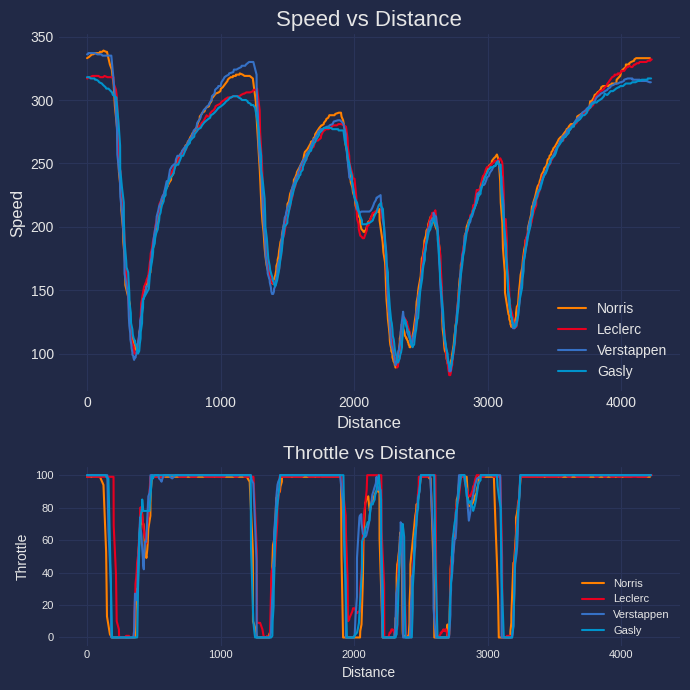

In [47]:
def get_driver_color(driver_abbreviation):
    driver = sprint.get_driver(driver_abbreviation)
    team_color = driver.TeamColor
    return hex_to_rgb(team_color)


fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_sprint_nor.Distance,
    tele_sprint_nor.Speed,
    label="Norris",
    color=get_driver_color("NOR"),
)
ax[0].plot(
    tele_sprint_lec.Distance,
    tele_sprint_lec.Speed,
    label="Leclerc",
    color=get_driver_color("LEC"),
)
ax[0].plot(
    tele_sprint_ver.Distance,
    tele_sprint_ver.Speed,
    label="Verstappen",
    color=get_driver_color("VER"),
)
ax[0].plot(
    tele_sprint_gas.Distance,
    tele_sprint_gas.Speed,
    label="Gasly",
    color=get_driver_color("GAS"),
)
ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_sprint_nor.Distance,
    tele_sprint_nor.Throttle,
    label="Norris",
    color=get_driver_color("NOR"),
)
ax[1].plot(
    tele_sprint_lec.Distance,
    tele_sprint_lec.Throttle,
    label="Leclerc",
    color=get_driver_color("LEC"),
)
ax[1].plot(
    tele_sprint_ver.Distance,
    tele_sprint_ver.Throttle,
    label="Verstappen",
    color=get_driver_color("VER"),
)
ax[1].plot(
    tele_sprint_gas.Distance,
    tele_sprint_gas.Throttle,
    label="Gasly",
    color=get_driver_color("GAS"),
)
ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

*Qualifyng*

In [ ]:
quali = f1.get_session(2024, "Brazil", "Q")
quali.load()

*Race*

In [52]:
race = f1.get_session(2024, "Brazil", "R")
race.load()

core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No 

In [53]:
race.results.loc[
    :, ["Abbreviation", "TeamName", "GridPosition", "Position", "Time", "Status"]
]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
1,VER,Red Bull Racing,17.0,1.0,0 days 02:06:54.430000,Finished
31,OCO,Alpine,4.0,2.0,0 days 00:00:19.477000,Finished
10,GAS,Alpine,13.0,3.0,0 days 00:00:22.532000,Finished
63,RUS,Mercedes,2.0,4.0,0 days 00:00:23.265000,Finished
16,LEC,Ferrari,6.0,5.0,0 days 00:00:30.177000,Finished
4,NOR,McLaren,1.0,6.0,0 days 00:00:31.372000,Finished
22,TSU,RB,3.0,7.0,0 days 00:00:42.056000,Finished
81,PIA,McLaren,8.0,8.0,0 days 00:00:44.943000,Finished
30,LAW,RB,5.0,9.0,0 days 00:00:50.452000,Finished
44,HAM,Mercedes,14.0,10.0,0 days 00:00:50.753000,Finished


In [54]:
laps = race.laps
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:13:34.222000,VER,1,0 days 00:01:39.161000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:49.176000,...,True,Red Bull Racing,0 days 01:11:54.770000,2024-11-03 15:49:57.516,12,12.0,False,,False,False
1,0 days 01:15:01.356000,VER,1,0 days 00:01:27.134000,2.0,1.0,NaT,NaT,0 days 00:00:21.981000,0 days 00:00:46.412000,...,True,Red Bull Racing,0 days 01:13:34.222000,2024-11-03 15:51:36.968,1,10.0,False,,False,True
2,0 days 01:16:27.596000,VER,1,0 days 00:01:26.240000,3.0,1.0,NaT,NaT,0 days 00:00:21.716000,0 days 00:00:45.980000,...,True,Red Bull Racing,0 days 01:15:01.356000,2024-11-03 15:53:04.102,1,10.0,False,,False,True
3,0 days 01:17:54.298000,VER,1,0 days 00:01:26.702000,4.0,1.0,NaT,NaT,0 days 00:00:22.151000,0 days 00:00:46.150000,...,True,Red Bull Racing,0 days 01:16:27.596000,2024-11-03 15:54:30.342,12,10.0,False,,False,True
4,0 days 01:19:19.692000,VER,1,0 days 00:01:25.394000,5.0,1.0,NaT,NaT,0 days 00:00:21.773000,0 days 00:00:45.180000,...,True,Red Bull Racing,0 days 01:17:54.298000,2024-11-03 15:55:57.044,1,9.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0 days 03:13:57.033000,PIA,81,0 days 00:01:21.840000,65.0,3.0,NaT,NaT,0 days 00:00:20.784000,0 days 00:00:43.137000,...,False,McLaren,0 days 03:12:35.193000,2024-11-03 17:50:37.939,1,7.0,False,,False,True
1131,0 days 03:15:18.917000,PIA,81,0 days 00:01:21.884000,66.0,3.0,NaT,NaT,0 days 00:00:20.864000,0 days 00:00:43.215000,...,False,McLaren,0 days 03:13:57.033000,2024-11-03 17:51:59.779,1,7.0,False,,False,True
1132,0 days 03:16:41.203000,PIA,81,0 days 00:01:22.286000,67.0,3.0,NaT,NaT,0 days 00:00:21.336000,0 days 00:00:43.159000,...,False,McLaren,0 days 03:15:18.917000,2024-11-03 17:53:21.663,1,7.0,False,,False,True
1133,0 days 03:18:02.922000,PIA,81,0 days 00:01:21.719000,68.0,3.0,NaT,NaT,0 days 00:00:20.873000,0 days 00:00:42.918000,...,False,McLaren,0 days 03:16:41.203000,2024-11-03 17:54:43.949,1,7.0,False,,False,True


In [55]:
ver_race = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race.pick_fastest().LapTime
ver_race_lap_time = ver_race["LapTime"]
ver_race_sec1 = ver_race["Sector1Time"]
ver_race_sec2 = ver_race["Sector2Time"]
ver_race_sec3 = ver_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_ver_race),
    "which was in Lap number",
    ver_race.pick_fastest().LapNumber,
)
ver_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:20.472000 which was in Lap number 67.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,0 days 00:01:39.161000,NaT,0 days 00:00:49.176000,0 days 00:00:18.794000,288.0,205.0,310.0,189.0
1,0 days 00:01:27.134000,0 days 00:00:21.981000,0 days 00:00:46.412000,0 days 00:00:18.741000,300.0,218.0,307.0,248.0
2,0 days 00:01:26.240000,0 days 00:00:21.716000,0 days 00:00:45.980000,0 days 00:00:18.544000,294.0,208.0,310.0,245.0
3,0 days 00:01:26.702000,0 days 00:00:22.151000,0 days 00:00:46.150000,0 days 00:00:18.401000,287.0,201.0,312.0,229.0
4,0 days 00:01:25.394000,0 days 00:00:21.773000,0 days 00:00:45.180000,0 days 00:00:18.441000,298.0,216.0,310.0,256.0


In [56]:
fastest_lap_race_ver = ver_race.pick_fastest()
tele_race_ver = fastest_lap_race_ver.get_telemetry().add_distance()
speed_race_ver = tele_race_ver.Speed
tele_race_ver.loc[:, ["Speed", "nGear", "RPM"]]

,Speed,nGear,RPM
2,309,8,10889
3,309,8,10895
4,309,8,10908
5,309,8,10913
6,310,8,10919
...,...,...,...
612,308,8,10813
613,308,8,10836
614,309,8,10859
615,309,8,10849


In [57]:
oco_race = race.laps.pick_driver("OCO")
fastest_lap_oco_race = oco_race.pick_fastest().LapTime
oco_race_lap_time = oco_race["LapTime"]
oco_race_sec1 = oco_race["Sector1Time"]
oco_race_sec2 = oco_race["Sector2Time"]
oco_race_sec3 = oco_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_oco_race),
    "which was in Lap number",
    oco_race.pick_fastest().LapNumber,
)
oco_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:21.771000 which was in Lap number 64.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
583,0 days 00:01:34.467000,NaT,0 days 00:00:46.939000,0 days 00:00:18.620000,261.0,198.0,305.0,192.0
584,0 days 00:01:26.376000,0 days 00:00:22.069000,0 days 00:00:45.797000,0 days 00:00:18.510000,283.0,201.0,296.0,226.0
585,0 days 00:01:26.338000,0 days 00:00:21.898000,0 days 00:00:45.879000,0 days 00:00:18.561000,293.0,201.0,304.0,233.0
586,0 days 00:01:25.703000,0 days 00:00:21.705000,0 days 00:00:45.520000,0 days 00:00:18.478000,280.0,207.0,304.0,236.0
587,0 days 00:01:25.417000,0 days 00:00:21.759000,0 days 00:00:45.152000,0 days 00:00:18.506000,286.0,209.0,304.0,240.0


In [58]:
fastest_lap_race_oco = oco_race.pick_fastest()
tele_race_oco = fastest_lap_race_oco.get_telemetry().add_distance()
speed_race_oco = tele_race_oco.Speed
tele_race_oco.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,305,8,10807
3,305,8,10815
4,306,8,10831
5,306,8,10851
6,307,8,10872
...,...,...,...
612,305,8,10786
613,305,8,10808
614,306,8,10831
615,306,8,10852


In [59]:
lec_race = race.laps.pick_driver("LEC")
fastest_lap_lec_race = lec_race.pick_fastest().LapTime
lec_race_lap_time = lec_race["LapTime"]
lec_race_sec1 = lec_race["Sector1Time"]
lec_race_sec2 = lec_race["Sector2Time"]
lec_race_sec3 = lec_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_lec_race),
    "which was in Lap number",
    lec_race.pick_fastest().LapNumber,
)
lec_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:21.631000 which was in Lap number 60.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
276,0 days 00:01:34.968000,NaT,0 days 00:00:47.029000,0 days 00:00:18.609000,269.0,214.0,305.0,192.0
277,0 days 00:01:26.521000,0 days 00:00:22.177000,0 days 00:00:45.952000,0 days 00:00:18.392000,294.0,218.0,307.0,230.0
278,0 days 00:01:26.205000,0 days 00:00:21.863000,0 days 00:00:45.787000,0 days 00:00:18.555000,291.0,218.0,306.0,238.0
279,0 days 00:01:26.165000,0 days 00:00:22.299000,0 days 00:00:45.427000,0 days 00:00:18.439000,297.0,218.0,305.0,236.0
280,0 days 00:01:25.018000,0 days 00:00:21.792000,0 days 00:00:44.993000,0 days 00:00:18.233000,300.0,226.0,308.0,239.0


In [60]:
fastest_lap_race_lec = lec_race.pick_fastest()
tele_race_lec = fastest_lap_race_lec.get_telemetry().add_distance()
speed_race_lec = tele_race_lec.Speed
tele_race_lec.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,308,8,10853
3,308,8,10858
4,309,8,10870
5,308,8,10869
6,308,8,10869
...,...,...,...
608,308,8,10835
609,308,8,10835
610,308,8,10847
611,308,8,10859


In [61]:
nor_race = race.laps.pick_driver("NOR")
fastest_lap_nor_race = nor_race.pick_fastest().LapTime
nor_race_lap_time = nor_race["LapTime"]
nor_race_sec1 = nor_race["Sector1Time"]
nor_race_sec2 = nor_race["Sector2Time"]
nor_race_sec3 = nor_race["Sector3Time"]
print(
    "Fastest Lap:",
    convert_to_normal(fastest_lap_nor_race),
    "which was in Lap number",
    nor_race.pick_fastest().LapNumber,
)
nor_race.loc[
    :,
    [
        "LapTime",
        "Sector1Time",
        "Sector2Time",
        "Sector3Time",
        "SpeedI1",
        "SpeedI2",
        "SpeedFL",
        "SpeedST",
    ],
].head()

Fastest Lap: 01:21.517000 which was in Lap number 67.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
652,0 days 00:01:31.803000,NaT,0 days 00:00:45.586000,0 days 00:00:18.477000,293.0,208.0,299.0,178.0
653,0 days 00:01:26.207000,0 days 00:00:21.920000,0 days 00:00:45.959000,0 days 00:00:18.328000,295.0,211.0,299.0,228.0
654,0 days 00:01:25.402000,0 days 00:00:21.685000,0 days 00:00:45.297000,0 days 00:00:18.420000,293.0,217.0,299.0,245.0
655,0 days 00:01:25.165000,0 days 00:00:21.695000,0 days 00:00:45.088000,0 days 00:00:18.382000,297.0,219.0,301.0,251.0
656,0 days 00:01:25.012000,0 days 00:00:21.699000,0 days 00:00:44.960000,0 days 00:00:18.353000,298.0,217.0,301.0,250.0


In [62]:
fastest_lap_race_nor = nor_race.pick_fastest()
tele_race_nor = fastest_lap_race_nor.get_telemetry().add_distance()
speed_race_nor = tele_race_nor.Speed
tele_race_nor.loc[:, ["Speed", "nGear", "RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,309,8,10815
3,309,8,10799
4,309,8,10804
5,309,8,10810
6,309,8,10816
...,...,...,...
622,309,8,10835
623,309,8,10866
624,310,8,10897
625,310,8,10847


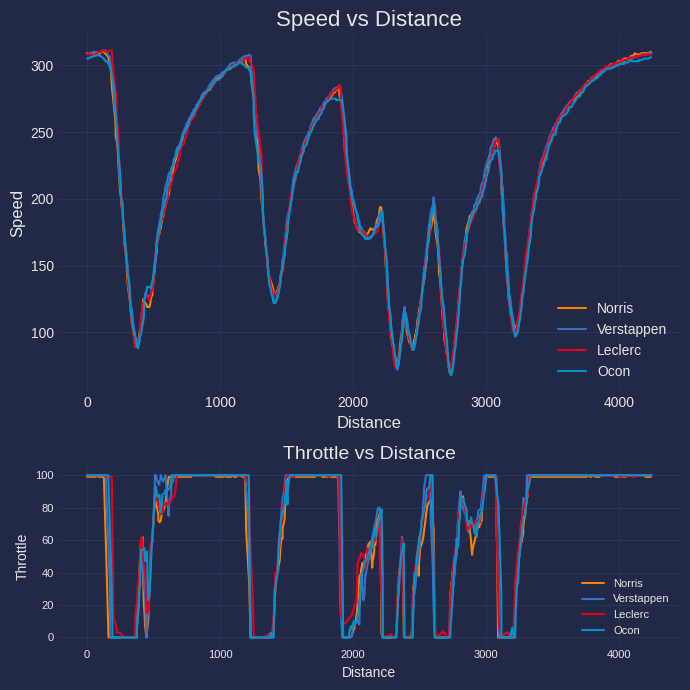

In [64]:
fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(
    tele_race_nor.Distance,
    tele_race_nor.Speed,
    label="Norris",
    color=get_driver_color("NOR"),
)
ax[0].plot(
    tele_race_ver.Distance,
    tele_race_ver.Speed,
    label="Verstappen",
    color=get_driver_color("VER"),
)
ax[0].plot(
    tele_race_lec.Distance,
    tele_race_lec.Speed,
    label="Leclerc",
    color=get_driver_color("LEC"),
)
ax[0].plot(
    tele_race_oco.Distance,
    tele_race_oco.Speed,
    label="Ocon",
    color=get_driver_color("OCO"),
)
ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis="both", which="major", labelsize=10)

ax[1].plot(
    tele_race_nor.Distance,
    tele_race_nor.Throttle,
    label="Norris",
    color=get_driver_color("NOR"),
)
ax[1].plot(
    tele_race_ver.Distance,
    tele_race_ver.Throttle,
    label="Verstappen",
    color=get_driver_color("VER"),
)
ax[1].plot(
    tele_race_lec.Distance,
    tele_race_lec.Throttle,
    label="Leclerc",
    color=get_driver_color("LEC"),
)
ax[1].plot(
    tele_race_oco.Distance,
    tele_race_oco.Throttle,
    label="Ocon",
    color=get_driver_color("OCO"),
)
ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis="both", which="major", labelsize=8)

plt.tight_layout()
plt.show()

In [65]:
driver1_sectors = pd.DataFrame({
    'Driver': ['Norris'] * len(nor_race_sec1),
    'Sector1Time': nor_race_sec1,
    'Sector2Time': nor_race_sec2,
    'Sector3Time': nor_race_sec3,
    'Lap Time' : nor_race_lap_time
})

driver2_sectors = pd.DataFrame({
    'Driver': ['Verstappen'] * len(ver_race_sec1),
    'Sector1Time': ver_race_sec1,
    'Sector2Time': ver_race_sec2,
    'Sector3Time': ver_race_sec3,
    'Lap Time' : ver_race_lap_time
})

driver3_sectors = pd.DataFrame({
    'Driver': ['Leclerc'] * len(lec_race_sec1),
    'Sector1Time': lec_race_sec1,
    'Sector2Time': lec_race_sec2,
    'Sector3Time': lec_race_sec3,
    'Lap Time' : lec_race_lap_time
})

driver3_sectors = pd.DataFrame({
    'Driver': ['Ocon'] * len(oco_race_sec1),
    'Sector1Time': oco_race_sec1,
    'Sector2Time': oco_race_sec2,
    'Sector3Time': oco_race_sec3,
    'Lap Time' : oco_race_lap_time
})

all_drivers_sectors = pd.concat([driver1_sectors, driver2_sectors, driver3_sectors], ignore_index=True)
all_drivers_sectors['Sector1Time'] = all_drivers_sectors['Sector1Time'].apply(convert_to_normal)
all_drivers_sectors['Sector2Time'] = all_drivers_sectors['Sector2Time'].apply(convert_to_normal)
all_drivers_sectors['Sector3Time'] = all_drivers_sectors['Sector3Time'].apply(convert_to_normal)
all_drivers_sectors['Lap Time'] = all_drivers_sectors['Lap Time'].apply(convert_to_normal)
all_drivers_sectors.sort_values(by=["Sector1Time","Sector2Time","Sector3Time"],ascending=True).dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
135,Verstappen,00:20.546000,00:42.236000,00:17.690000,01:20.472000
133,Verstappen,00:20.581000,00:42.614000,00:17.795000,01:20.990000
130,Verstappen,00:20.611000,00:42.604000,00:17.854000,01:21.069000
132,Verstappen,00:20.632000,00:42.559000,00:17.838000,01:21.029000
137,Verstappen,00:20.643000,00:42.806000,00:17.873000,01:21.322000
...,...,...,...,...,...
99,Verstappen,00:33.013000,01:00.259000,00:31.695000,02:04.967000
40,Norris,00:33.078000,01:02.872000,00:29.189000,02:05.139000
168,Ocon,00:33.112000,01:08.064000,00:30.934000,02:12.110000
30,Norris,00:35.064000,00:58.390000,00:33.510000,02:06.964000


posx and posy should be finite values
posx and posy should be finite values


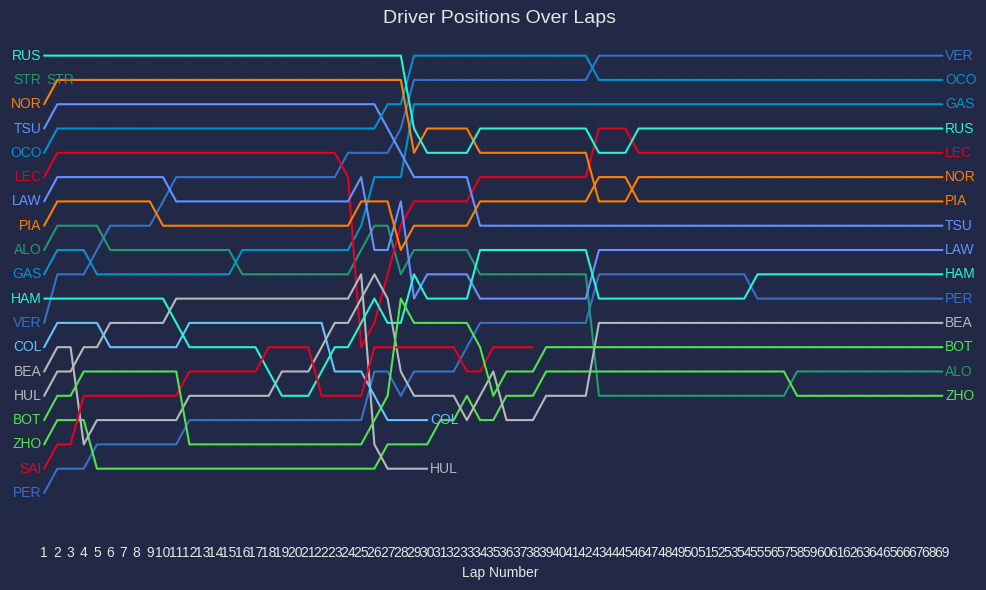

In [68]:
# Get unique drivers and total number of laps
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

# Initialize an empty dictionary to store team colors
team_colors = {}

# Fetch the team color for each driver dynamically and convert to RGB
for driver in drivers_ab:
    driver_object = race.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

# Plot each driver's positions with their team color
plt.figure(figsize=(10, 6))  # Adjust figure size
for driver in drivers_ab:
    positions = laps[laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))  # Default to gray if no color is specified
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    # Annotate driver name at the start of the line
    plt.text(
        1 - 0.2,  # Slightly to the left of the first lap
        positions[0],  # Y-coordinate of the first position
        driver,  # Driver's name
        color=color,  # Use the driver's color
        fontsize=10,  # Font size
        verticalalignment='center',  # Center the text vertically
        horizontalalignment='right'  # Align text to the right of the point
    )
    
    # Annotate driver name at the end of the line
    plt.text(
        len(positions) + 0.2,  # Slightly to the right of the last lap
        positions[-1],  # Y-coordinate of the last position
        driver,  # Driver's name
        color=color,  # Use the driver's color
        fontsize=10,  # Font size
        verticalalignment='center',  # Center the text vertically
        horizontalalignment='left'  # Align text to the left of the point
    )

# Add plot title and labels
plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)  # Extend x-axis to leave space for annotations
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()  # Invert y-axis so positions are ranked correctly
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

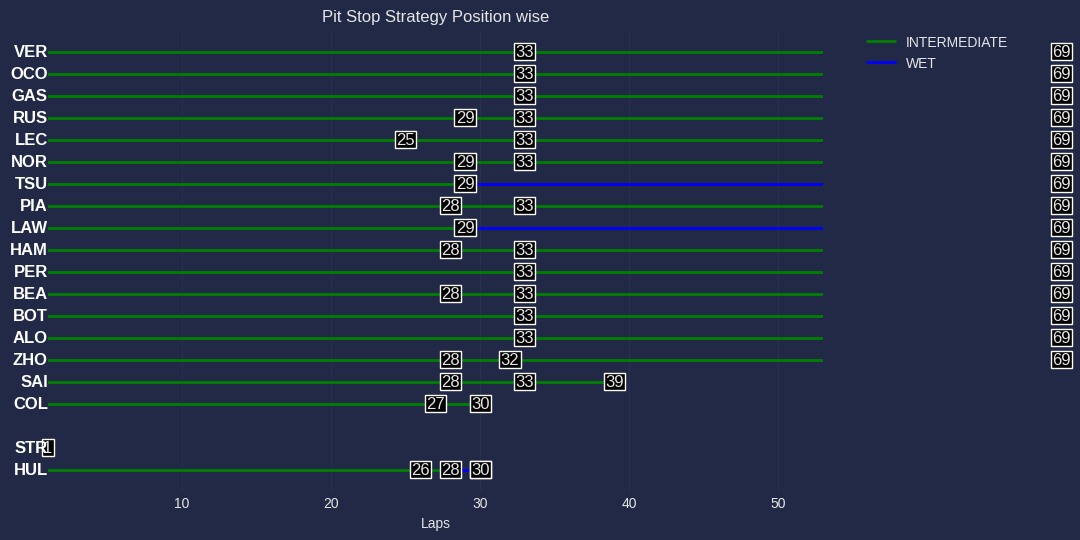

In [69]:
def getDriverPosition(abbreviation: str):
    res = race.results
    c = res["Abbreviation"] == abbreviation
    pos = res.loc[c, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "unknown")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()


In [70]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)
    

/tmp/ipykernel_73386/2770152713.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
8,LAW,271.0
16,COL,271.0
3,RUS,271.0
6,TSU,273.0
14,ZHO,274.0
19,HUL,275.0
7,PIA,277.0
2,GAS,278.0
15,SAI,278.0
1,OCO,281.0


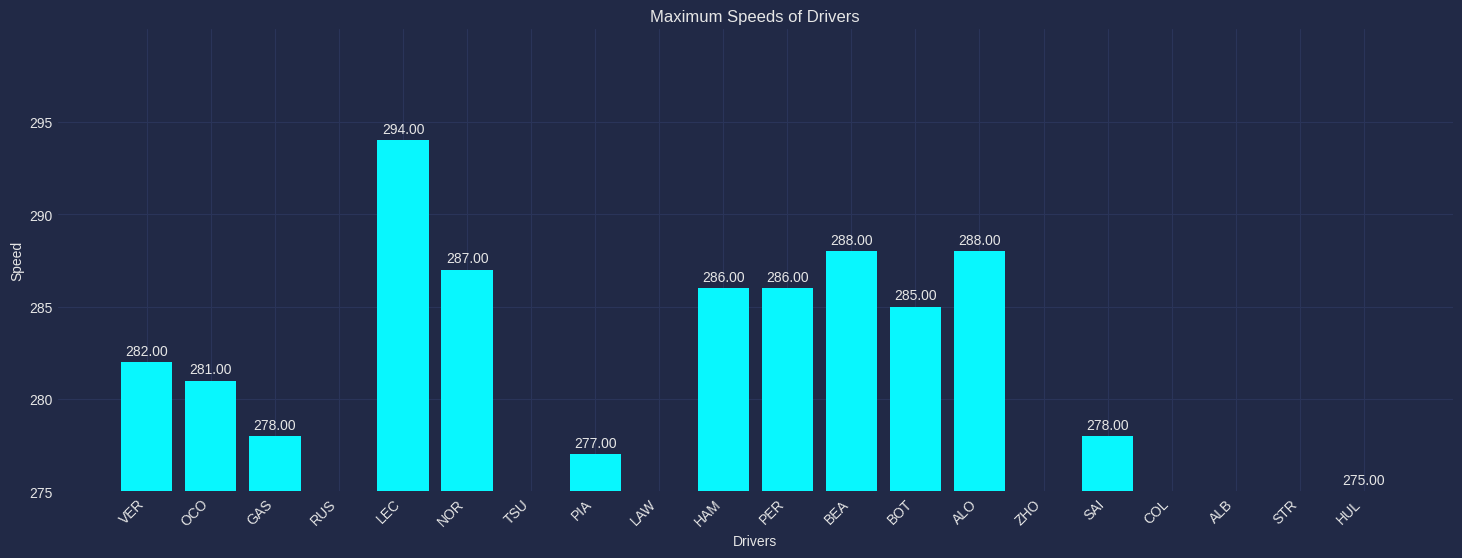

In [72]:
fig,ax = plt.subplots(figsize=(18, 6))


bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])

ax.set_xlabel('Drivers')

ax.set_ylabel('Speed')

ax.set_title('Maximum Speeds of Drivers')

plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Display the plot
plt.show()

In [73]:
plotting.setup_mpl()

In [74]:
laps_lec = laps.pick_driver("LEC")
laps_ver = laps.pick_driver("VER")

fastest_lec = laps_lec.pick_fastest().get_telemetry().add_distance()
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()

fastest_lec["Driver"] = "LEC"
fastest_ver["Driver"] = "VER"
telemetry = pd.concat([fastest_lec,fastest_ver])

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [75]:
num_minisectors = 25

total_distance = total_distance = max(telemetry['Distance'])

minisector_length = total_distance / num_minisectors

In [76]:
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [77]:

telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [78]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,LEC,309.071429
1,1,VER,309.866667
2,2,LEC,199.360000
3,2,VER,192.520000
4,3,LEC,112.024390
5,3,VER,111.550000
6,4,LEC,194.269231
7,4,VER,200.000000
8,5,LEC,252.222222
9,5,VER,257.650000


In [79]:
# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [80]:

# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'LEC', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 2

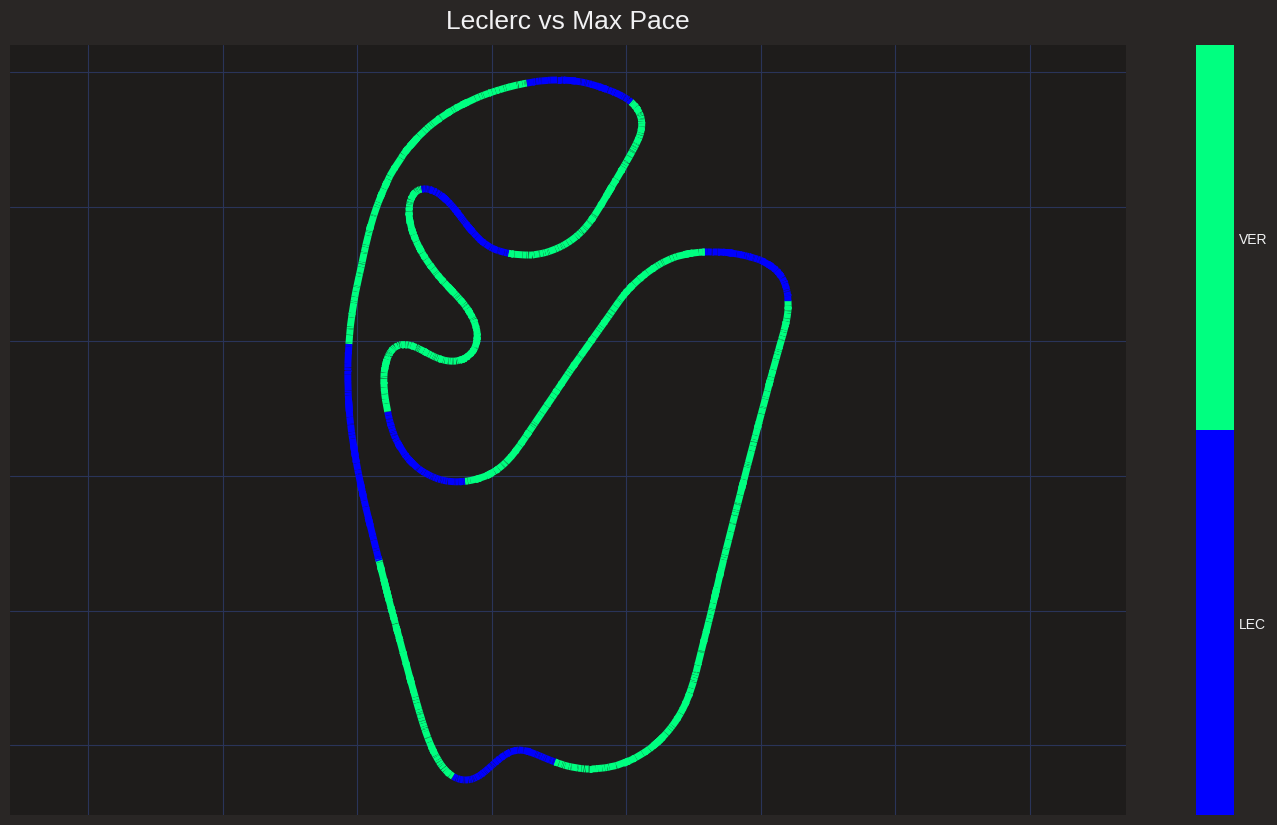

In [105]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# Adjust the colorbar settings
cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['LEC', 'VER'])
plt.title("Leclerc vs Max Pace")
plt.show()


In [97]:
laps_nor = laps.pick_driver("NOR")
laps_ver = laps.pick_driver("VER")

fastest_nor = laps_nor.pick_fastest().get_telemetry().add_distance()
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()

fastest_nor["Driver"] = "NOR"
fastest_ver["Driver"] = "VER"
telemetry = pd.concat([fastest_nor,fastest_ver])

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [98]:
num_minisectors = 25

total_distance = total_distance = max(telemetry['Distance'])

minisector_length = total_distance / num_minisectors

In [99]:
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [100]:

telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [101]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,NOR,308.500000
1,1,VER,309.866667
2,2,NOR,189.576923
3,2,VER,192.520000
4,3,NOR,112.146341
5,3,VER,111.550000
6,4,NOR,192.320000
7,4,VER,200.000000
8,5,NOR,254.352941
9,5,VER,257.650000


In [102]:
# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [103]:

# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'NOR', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 2

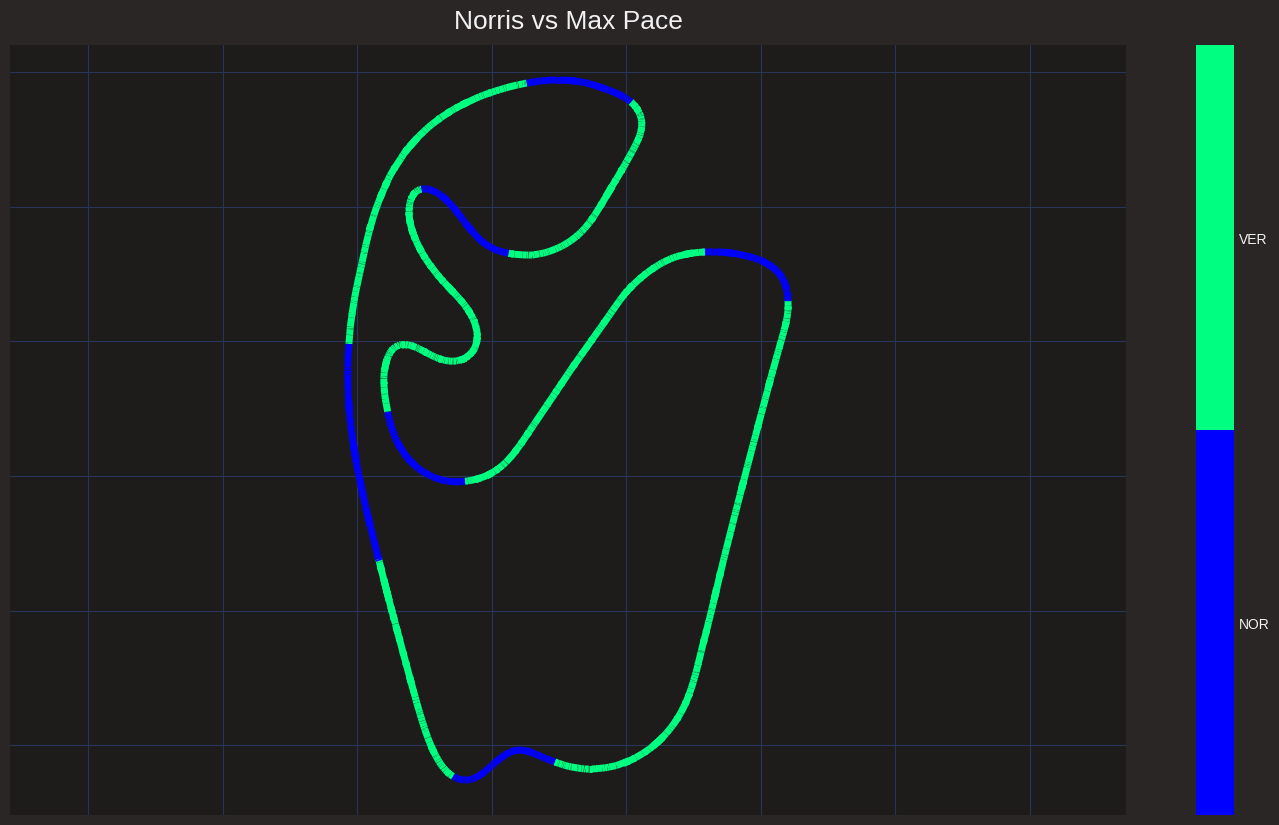

In [104]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# Adjust the colorbar settings
cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['NOR', 'VER'])
plt.title("Norris vs Max Pace")
plt.show()
